In [78]:
import tensorflow.compat.v1 as tf
from keras.datasets.fashion_mnist import load_data

In [79]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot


In [80]:
def define_discriminator(in_shape=(28,28,1)):
    
    model=Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),padding='same',input_shape=in_shape)),
    model.add(LeakyReLU(alpha=0.2)),
    model.add(Dropout(rate=0.4)),
    model.add(Conv2D(filters=64,kernel_size=(5,5),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.3))
    model.add(Dropout(rate=0.2))
    model.add(Flatten())
    model.add(Dense(units=1,activation='sigmoid'))
    
    opt=Adam(lr=0.001,beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model

In [81]:
def load_real_samples():
    
    (X_train,_),(_,_)=load_data()
    X=expand_dims(X_train,axis=-1)
    X=X.astype('float32')
    X=X/255.0
    print(X.shape)
    
    return X


In [82]:
def generate_real_samples(dataset,n_samples):
    
    ix=randint(0,dataset.shape[0],n_samples)
    X=dataset[ix]
    y=ones((n_samples,1))
    
    return X,y

In [83]:
def generate_fake_samples(n_samples):
    
    X=randn(28*28*n_samples)
    X=X.reshape((n_samples,28,28,1))
    y=zeros((n_samples,1))
    
    return X,y

In [84]:
def train_discriminator(model,dataset,n_iters=50,batch_size=512):
    h_batch_size=int(batch_size/2)
    
    for i in range(n_iters):
        
        X_real,y_real=generate_real_samples(dataset,h_batch_size)
        _,real_acc=model.train_on_batch(X_real,y_real)
        
        X_fake,y_fake=generate_fake_samples(h_batch_size)
        _,fake_acc=model.train_on_batch(X_fake,y_fake)
        
        print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))
        

 
# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()        

4423680/4422102 [==============================] - 1s 0us/step
(60000, 28, 28, 1)


In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu_41 (LeakyReLU)   (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
leaky_re_lu_42 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3136)              0         
__________

In [86]:
train_discriminator(model,dataset)

>1 real=34% fake=30%
>2 real=99% fake=99%
>3 real=100% fake=100%
>4 real=100% fake=100%
>5 real=100% fake=100%
>6 real=100% fake=100%
>7 real=100% fake=100%
>8 real=100% fake=100%
>9 real=100% fake=100%
>10 real=100% fake=100%
>11 real=100% fake=100%
>12 real=100% fake=100%
>13 real=100% fake=100%
>14 real=100% fake=100%
>15 real=100% fake=100%
>16 real=100% fake=100%
>17 real=100% fake=100%
>18 real=100% fake=100%
>19 real=100% fake=100%
>20 real=100% fake=100%
>21 real=100% fake=100%
>22 real=100% fake=100%
>23 real=100% fake=100%
>24 real=100% fake=100%
>25 real=100% fake=100%
>26 real=100% fake=100%
>27 real=100% fake=100%
>28 real=100% fake=100%
>29 real=100% fake=100%
>30 real=100% fake=100%
>31 real=100% fake=100%
>32 real=100% fake=100%
>33 real=100% fake=100%
>34 real=100% fake=100%
>35 real=100% fake=100%
>36 real=100% fake=100%
>37 real=100% fake=100%
>38 real=100% fake=100%
>39 real=100% fake=100%
>40 real=100% fake=100%
>41 real=100% fake=100%
>42 real=100% fake=100%
>43 r

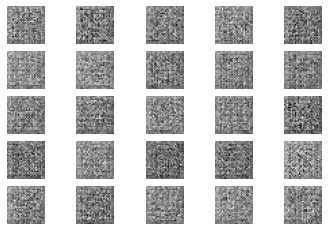

In [87]:
from numpy import zeros
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from matplotlib import pyplot
 
# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='tanh', padding='same'))
	return model
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y
 
# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 25
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
	# define subplot
	pyplot.subplot(5, 5, 1 + i)
	# turn off axis labels
	pyplot.axis('off')
	# plot single image
	pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
# show the figure
pyplot.show()

In [88]:

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [89]:
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	# save plot to file
	filename = 'generated_plottt_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

In [90]:

# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)

In [91]:

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # create training set for the discriminator
            X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
            # update discriminator model weights
            d_loss, _ = d_model.train_on_batch(X, y)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            if (j+1)%100==0:                                
                print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
        # evaluate the model performance, sometimes
        if (i+1) % 2 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)
 

In [ ]:

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim,n_epochs=30)

(60000, 28, 28, 1)


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, 100/234, d=0.462, g=1.553
>1, 200/234, d=0.589, g=1.051
>2, 100/234, d=0.551, g=1.132
>2, 200/234, d=0.502, g=0.923
>Accuracy real: 96%, fake: 63%
>3, 100/234, d=0.486, g=1.096
>3, 200/234, d=0.501, g=0.992
>4, 100/234, d=0.521, g=1.644
>4, 200/234, d=0.572, g=1.929
>Accuracy real: 96%, fake: 83%
>5, 100/234, d=0.446, g=1.417
>5, 200/234, d=0.375, g=1.377
>6, 100/234, d=0.486, g=0.973
>6, 200/234, d=0.612, g=0.767
>Accuracy real: 83%, fake: 97%
>7, 100/234, d=0.522, g=1.346
>7, 200/234, d=0.512, g=0.909
>8, 100/234, d=0.624, g=1.791
>8, 200/234, d=0.570, g=1.186
>Accuracy real: 93%, fake: 70%
>9, 100/234, d=0.570, g=1.539
>9, 200/234, d=0.502, g=1.294
>10, 100/234, d=0.520, g=1.275
>10, 200/234, d=0.514, g=0.965
>Accuracy real: 58%, fake: 99%
>11, 100/234, d=0.546, g=1.125
>11, 200/234, d=0.545, g=1.624
>12, 100/234, d=0.597, g=0.966
>12, 200/234, d=0.566, g=1.386
>Accuracy real: 91%, fake: 82%
>13, 100/234, d=0.493, g=0.870
>13, 200/234, d=0.544, g=0.854
>14, 100/234, d=0.537, g=1

fsgdfxccvzdfd 

In [41]:
def define_generator(latent_dim):
    
    model=Sequential()
    n_nodes=128*7*7
    model.add(Dense(n_nodes,input_shape=generate_latent_points(latent_dim,n_samples)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7,7,128)))
    model.add(Conv2DTranspose(128,kernel=(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.3))
    model.add(Conv2DTranspose(64,kernel=(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.4))
    model.add(Conv2DTranspose(1,kernel=(7,7),activation='sigmoid'),padding='same')
    
    return model

In [42]:
def generate_latent_points(latent_dim,n_samples):
    
    X=randn(latent_dim*n_samples)
    X=X.reshape(n_samples,latent_dim)
    
    return X

In [43]:
def generate_fake_examples(g_model,latent_dim,n_samples):
    
    latent_points=generate_latent_points(latent_dim,n_samples)
    X=g_model.predict(latent_points)
    y=zeros((n_samples,1))
    
    return X,y
    

In [44]:
def define_gan(g_model,d_model):
    
    d_model.trainable=False
    model=Sequential()
    model.add(g_model)
    model.add(d_model)
    
    opt=Adam(lr=0.001,beta_1=0.4)
    
    model.compile(loss='binary_crossentropy',optimizer=opt)
    
    return model

In [45]:

# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)

In [46]:

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # create training set for the discriminator
            X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
            # update discriminator model weights
            d_loss, _ = d_model.train_on_batch(X, y)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            if (j+1)%100==0:                                
                print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
        # evaluate the model performance, sometimes
        if (i+1) % 5 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)
 

In [47]:

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim,n_epochs=30)

NameError: name 'n_samples' is not defined